In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [88]:
DF = pd.read_csv('DF')
DF_SDG = pd.read_csv('DF_SDG_Lee')
DF_ML = pd.read_csv('DF_MachineLearning_Lee')
DF_SDG_ML = pd.concat([DF_SDG, DF_ML], ignore_index=True)

In [96]:
DF['log_num_authors'] = np.log(DF['num_authors'] + 1)
DF['log_num_authors_squared'] = DF['log_num_authors']**2

DF_SDG['log_num_authors_SDG'] = np.log(DF_SDG['num_authors'] + 1)
DF_SDG['log_num_authors_squared_SDG'] = DF_SDG['log_num_authors_SDG']**2

In [97]:
DF.corr()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors,log_num_authors_squared
PMID,1.000000,0.004193,0.022022,-0.000328,-0.027966,0.014033,-0.015626,-0.004670
year,0.004193,1.000000,-0.237062,0.067355,0.038540,-0.001280,0.098606,0.082681
num_citations,0.022022,-0.237062,1.000000,0.081276,0.019398,-0.022876,0.054411,0.091630
num_authors,-0.000328,0.067355,0.081276,1.000000,0.038328,0.032758,0.772121,0.912487
Commonness_Score,-0.027966,0.038540,0.019398,0.038328,1.000000,-0.031218,0.052558,0.046871
SDG_dummy,0.014033,-0.001280,-0.022876,0.032758,-0.031218,1.000000,0.068354,0.054622
log_num_authors,-0.015626,0.098606,0.054411,0.772121,0.052558,0.068354,1.000000,0.951496
log_num_authors_squared,-0.004670,0.082681,0.091630,0.912487,0.046871,0.054622,0.951496,1.000000


In [98]:
DF_SDG.corr()

,PMID,year,num_citations,num_authors,Commonness_Score,SDG_dummy,log_num_authors_SDG,log_num_authors_squared_SDG
PMID,1.000000,0.033982,0.002696,-0.018126,0.024223,0.046525,-0.033221,-0.023308
year,0.033982,1.000000,-0.212376,0.057663,-0.052501,-0.006587,0.103993,0.087966
num_citations,0.002696,-0.212376,1.000000,-0.000872,0.049038,-0.019967,-0.058117,-0.017874
num_authors,-0.018126,0.057663,-0.000872,1.000000,0.074139,0.049737,0.757696,0.903469
Commonness_Score,0.024223,-0.052501,0.049038,0.074139,1.000000,0.004095,0.154601,0.125754
SDG_dummy,0.046525,-0.006587,-0.019967,0.049737,0.004095,1.000000,0.017414,0.029167
log_num_authors_SDG,-0.033221,0.103993,-0.058117,0.757696,0.154601,0.017414,1.000000,0.953551
log_num_authors_squared_SDG,-0.023308,0.087966,-0.017874,0.903469,0.125754,0.029167,0.953551,1.000000


In [99]:
Y = DF['Commonness_Score']
X = DF[['log_num_authors','log_num_authors_squared']]
X = sm.add_constant(X)

Y_SDG = DF_SDG['Commonness_Score']
X_SDG = DF_SDG[['log_num_authors_SDG','log_num_authors_squared_SDG']]
X_SDG = sm.add_constant(X_SDG)

In [45]:
model_DF = sm.OLS(Y, X).fit()
model_DF.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Commonness_Score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.628
Date:                Fri, 24 May 2024   Prob (F-statistic):             0.0267
Time:                        20:36:42   Log-Likelihood:                -5180.5
No. Observations:                2527   AIC:                         1.037e+04
Df Residuals:                    2524   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8212      0.177    -21.566      0.000      -4.169      -3.474
log_num_authors             0.2457      0.189      1.302      0.193      -0.124       0.616
log_num_authors_squared    -0.0245      0.048     -0.513      0.608      -0.118       0.069
==============================================================================
Omnibus:                      302.158   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.638
Skew:                          -0.845   Prob(JB):                    2.33e-103
Kurtosis:                       4.279   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

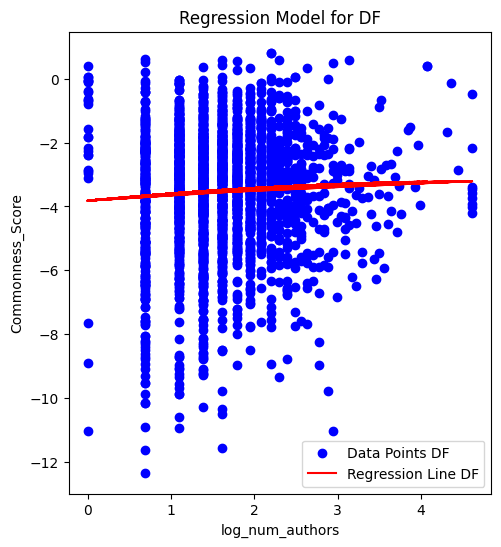

In [103]:
DF['predicted'] = model_DF.predict(X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(DF['log_num_authors'], DF['Commonness_Score'], color='blue', label='Data Points DF')
plt.plot(DF['log_num_authors'], DF['predicted'], color='red', label='Regression Line DF')
plt.xlabel('log_num_authors')
plt.ylabel('Commonness_Score')
plt.title('Regression Model for DF')
plt.legend()

In [50]:
model_DFSDG = sm.OLS(Y_SDG, X_SDG).fit()
model_DFSDG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Commonness_Score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.85
Date:                Fri, 24 May 2024   Prob (F-statistic):           4.41e-07
Time:                        20:37:23   Log-Likelihood:                -1935.4
No. Observations:                 995   AIC:                             3877.
Df Residuals:                     992   BIC:                             3891.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.6644      0.263    -17.728      0.000      -5.181      -4.148
log_num_authors             1.0523      0.286      3.681      0.000       0.491       1.613
log_num_authors_squared    -0.1658      0.072     -2.299      0.022      -0.307      -0.024
==============================================================================
Omnibus:                      137.598   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.752
Skew:                          -0.937   Prob(JB):                     6.33e-47
Kurtosis:                       4.272   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

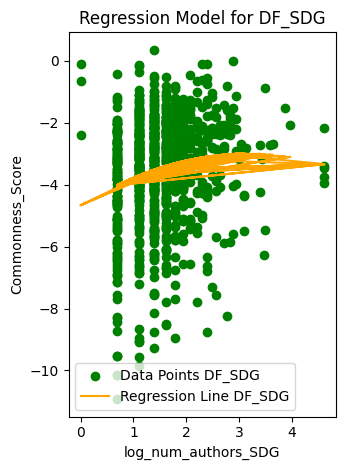

In [106]:
DF_SDG['predicted'] = model_DFSDG.predict(X_SDG)

plt.subplot(1, 2, 2)
plt.scatter(DF_SDG['log_num_authors_SDG'], DF_SDG['Commonness_Score'], color='green', label='Data Points DF_SDG')
plt.plot(DF_SDG['log_num_authors_SDG'], DF_SDG['predicted'], color='orange', label='Regression Line DF_SDG')
plt.xlabel('log_num_authors_SDG')
plt.ylabel('Commonness_Score')
plt.title('Regression Model for DF_SDG')
plt.legend()

plt.tight_layout()
plt.show()